# Explore Cleaned CM1 Dataset

## Detail about CM1

CM1 is a NASA spacecraft instrument (data collection and processing) written in “C”. At various times, researchers have negotiated access to the CM source code.

## Some guidelines

1. Look at the raw data
1. Load dataset
1. Summarize the dataset 
1. Correlation between attributes
1. Skewed of univariate distribution
1. Data visualization

### Look at the raw data 

In [1]:
!head -5 NASADefectDataset/CleanData/csv/D1/D1-cm1.csv

id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
1,6,9,2,1,0,16,5,0.2,8,2,3,0.6,17,1,0,24,3,32.54,9.5,2936.77,0.1,63,0.11,163.15,309.13,0.2,4,8,14,0.16,19,44,15,15,32,4,25,N
2,15,7,3,1,19,12,4,0.13,6,2,2,0.5,17,1,0,31,1,38.55,21.52,17846.19,0.28,141,0.05,991.46,829.45,0.25,3,6,15,0.06,51,90,32,27,67,39.22,32,Y
3,27,9,1,4,22,16,5,0.15,8,2,3,0.6,18,1,0,29,0,52.03,12.33,7914.68,0.21,111,0.08,439.7,641.

### Load dataset

In [2]:
import pandas as pd

filename = "D1-cm1.csv"
relativepath = 'NASADefectDataset/Cleandata/csv/D1/'

#Get the column header from the csv file
colnames = pd.read_csv(relativepath+filename, nrows=1)

#Set the preferred max_columns of the output
pd.set_option('display.max_columns', 8)        
print(colnames)

#Read everything omitting the 'id' column
data = pd.read_csv(relativepath+filename, usecols = [i for i in colnames if i != 'id'])
peek = data.head(5)
peek

   id  LOC_BLANK  BRANCH_COUNT  CALL_PAIRS    ...      NUMBER_OF_LINES  \
0   1          6             9           2    ...                   32   

   PERCENT_COMMENTS  LOC_TOTAL  Defective  
0                 4         25          N  

[1 rows x 39 columns]


,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,...,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,6,9,2,1,...,32,4.00,25,N
1,15,7,3,1,...,67,39.22,32,Y
2,27,9,1,4,...,83,47.27,33,Y
3,7,3,2,0,...,20,0.00,12,N
4,51,25,13,0,...,172,11.67,106,N


### Summarize the dataset

1. Dimension
1. Data type
1. Missing values in the attributes
1. Descriptive statistics
1. Number of instances for the Defective attribute

In [4]:
# Dimension
# Get how many instances (rows) and how many attributes (columns) are contained in the data
print(data.shape)

(344, 38)


In [5]:
# Data Type
print(data.dtypes)

LOC_BLANK                            int64
BRANCH_COUNT                         int64
CALL_PAIRS                           int64
LOC_CODE_AND_COMMENT                 int64
LOC_COMMENTS                         int64
CONDITION_COUNT                      int64
CYCLOMATIC_COMPLEXITY                int64
CYCLOMATIC_DENSITY                 float64
DECISION_COUNT                       int64
DECISION_DENSITY                   float64
DESIGN_COMPLEXITY                    int64
DESIGN_DENSITY                     float64
EDGE_COUNT                           int64
ESSENTIAL_COMPLEXITY                 int64
ESSENTIAL_DENSITY                  float64
LOC_EXECUTABLE                       int64
PARAMETER_COUNT                      int64
HALSTEAD_CONTENT                   float64
HALSTEAD_DIFFICULTY                float64
HALSTEAD_EFFORT                    float64
HALSTEAD_ERROR_EST                 float64
HALSTEAD_LENGTH                      int64
HALSTEAD_LEVEL                     float64
HALSTEAD_PR

In [6]:
# Identify missing values in any columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 38 columns):
LOC_BLANK                          344 non-null int64
BRANCH_COUNT                       344 non-null int64
CALL_PAIRS                         344 non-null int64
LOC_CODE_AND_COMMENT               344 non-null int64
LOC_COMMENTS                       344 non-null int64
CONDITION_COUNT                    344 non-null int64
CYCLOMATIC_COMPLEXITY              344 non-null int64
CYCLOMATIC_DENSITY                 344 non-null float64
DECISION_COUNT                     344 non-null int64
DECISION_DENSITY                   344 non-null float64
DESIGN_COMPLEXITY                  344 non-null int64
DESIGN_DENSITY                     344 non-null float64
EDGE_COUNT                         344 non-null int64
ESSENTIAL_COMPLEXITY               344 non-null int64
ESSENTIAL_DENSITY                  344 non-null float64
LOC_EXECUTABLE                     344 non-null int64
PARAMETER_COUNT        

In [7]:
# Descriptive Statistics
#Set the preferred max_columns of the output
pd.set_option('display.max_columns', 4)    
#Set the precision of the output
pd.set_option('precision', 3)

# Look at a summary of each attribute
print(data.describe())

       LOC_BLANK  BRANCH_COUNT    ...      PERCENT_COMMENTS  LOC_TOTAL
count    344.000       344.000    ...               344.000    344.000
mean      16.052        12.567    ...                29.027     45.017
std       22.801        16.544    ...                18.977     55.342
min        0.000         3.000    ...                 0.000      7.000
25%        3.000         5.000    ...                13.640     17.000
50%        9.000         7.000    ...                30.770     27.000
75%       19.000        13.000    ...                44.848     50.000
max      164.000       162.000    ...                71.930    503.000

[8 rows x 37 columns]


In [8]:
# Look at the number of instances (rows) that belong to each Defective
print(data.groupby('Defective').size())

Defective
N    302
Y     42
dtype: int64


### Correlation between attributes

1. Pearson
1. Spearman
1. Kendall

In [9]:
#Set the preferred max_columns of the output
pd.set_option('display.max_columns', 6)    
#Set the precision of the output
pd.set_option('precision', 3)
pcorrelations = data.corr(method='pearson')
pcorrelations

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,...,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
LOC_BLANK,1.000e+00,0.649,0.567,...,0.820,0.327,0.682
BRANCH_COUNT,6.485e-01,1.000,0.621,...,0.907,0.153,0.954
CALL_PAIRS,5.665e-01,0.621,1.000,...,0.714,0.256,0.692
LOC_CODE_AND_COMMENT,6.715e-01,0.736,0.460,...,0.738,0.358,0.748
LOC_COMMENTS,5.676e-01,0.797,0.649,...,0.854,0.401,0.832
CONDITION_COUNT,6.216e-01,0.969,0.569,...,0.866,0.166,0.915
CYCLOMATIC_COMPLEXITY,6.481e-01,0.991,0.630,...,0.908,0.142,0.952
CYCLOMATIC_DENSITY,-1.525e-01,0.033,-0.218,...,-0.192,-0.244,-0.171
DECISION_COUNT,6.221e-01,0.958,0.561,...,0.861,0.166,0.908
DECISION_DENSITY,1.058e-02,0.117,0.068,...,0.056,-0.055,0.057


In [10]:
scorrelations = data.corr(method='spearman')
scorrelations

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,...,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
LOC_BLANK,1.000,0.606,0.609,...,0.821,0.506,0.690
BRANCH_COUNT,0.606,1.000,0.593,...,0.800,0.170,0.857
CALL_PAIRS,0.609,0.593,1.000,...,0.751,0.292,0.709
LOC_CODE_AND_COMMENT,0.636,0.536,0.404,...,0.657,0.597,0.604
LOC_COMMENTS,0.662,0.526,0.617,...,0.815,0.766,0.653
CONDITION_COUNT,0.620,0.968,0.574,...,0.789,0.182,0.834
CYCLOMATIC_COMPLEXITY,0.600,0.999,0.592,...,0.798,0.167,0.857
CYCLOMATIC_DENSITY,-0.253,0.093,-0.310,...,-0.371,-0.191,-0.367
DECISION_COUNT,0.631,0.942,0.577,...,0.790,0.188,0.832
DECISION_DENSITY,0.195,0.516,0.239,...,0.321,0.063,0.356


In [11]:
kcorrelations = data.corr(method='kendall')
kcorrelations

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,...,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
LOC_BLANK,1.000,0.462,0.472,...,0.670,0.353,0.530
BRANCH_COUNT,0.462,1.000,0.473,...,0.644,0.119,0.720
CALL_PAIRS,0.472,0.473,1.000,...,0.593,0.212,0.552
LOC_CODE_AND_COMMENT,0.490,0.421,0.312,...,0.505,0.446,0.460
LOC_COMMENTS,0.503,0.399,0.481,...,0.645,0.581,0.487
CONDITION_COUNT,0.469,0.926,0.453,...,0.628,0.128,0.691
CYCLOMATIC_COMPLEXITY,0.458,0.990,0.473,...,0.642,0.117,0.720
CYCLOMATIC_DENSITY,-0.183,0.068,-0.226,...,-0.261,-0.130,-0.267
DECISION_COUNT,0.486,0.888,0.463,...,0.639,0.135,0.697
DECISION_DENSITY,0.153,0.400,0.194,...,0.244,0.050,0.268


### Skewed of univariate distributions

In [13]:
skew = data.skew()
print(skew)

LOC_BLANK                          3.468
BRANCH_COUNT                       4.796
CALL_PAIRS                         2.219
LOC_CODE_AND_COMMENT               3.832
LOC_COMMENTS                       5.484
CONDITION_COUNT                    4.436
CYCLOMATIC_COMPLEXITY              5.171
CYCLOMATIC_DENSITY                 1.273
DECISION_COUNT                     4.359
DECISION_DENSITY                   4.939
DESIGN_COMPLEXITY                  4.638
DESIGN_DENSITY                    -0.414
EDGE_COUNT                         4.159
ESSENTIAL_COMPLEXITY               3.439
ESSENTIAL_DENSITY                  1.309
LOC_EXECUTABLE                     4.338
PARAMETER_COUNT                    2.932
HALSTEAD_CONTENT                   2.392
HALSTEAD_DIFFICULTY                2.572
HALSTEAD_EFFORT                    9.469
HALSTEAD_ERROR_EST                 4.245
HALSTEAD_LENGTH                    3.517
HALSTEAD_LEVEL                     2.447
HALSTEAD_PROG_TIME                 9.469
HALSTEAD_VOLUME 

### Data visualization

1. box
1. hist

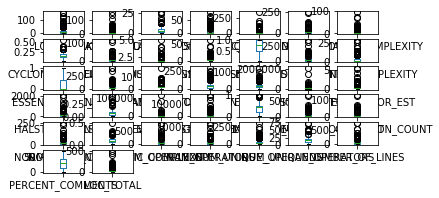

In [14]:
import matplotlib.pyplot as plt
# Univariate plots of each individual variable
# box with whisker
data.plot(kind='box', subplots=True, layout=(8,7),  sharex=False, sharey=False)
plt.rcParams["figure.figsize"] = [16,16]
plt.show()

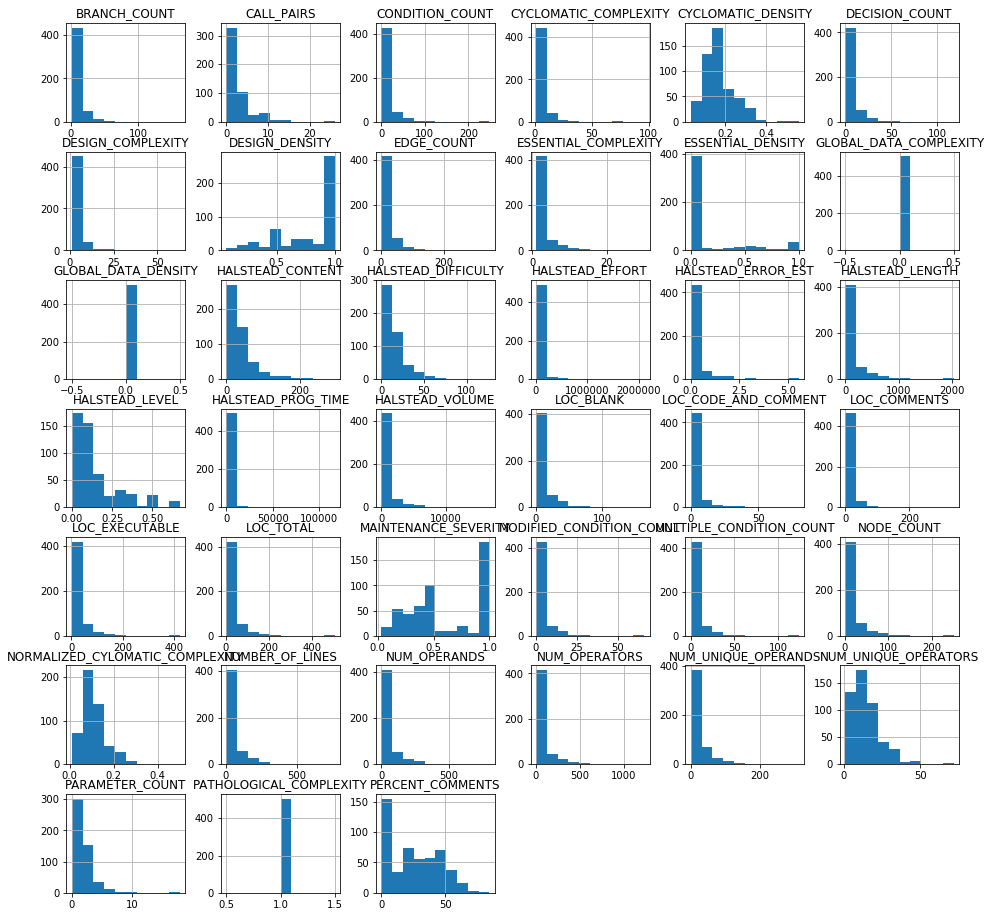

In [15]:
# Univariate plots of each individual variable
# hist
data.hist()
plt.rcParams["figure.figsize"] = [16,16]
plt.show()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


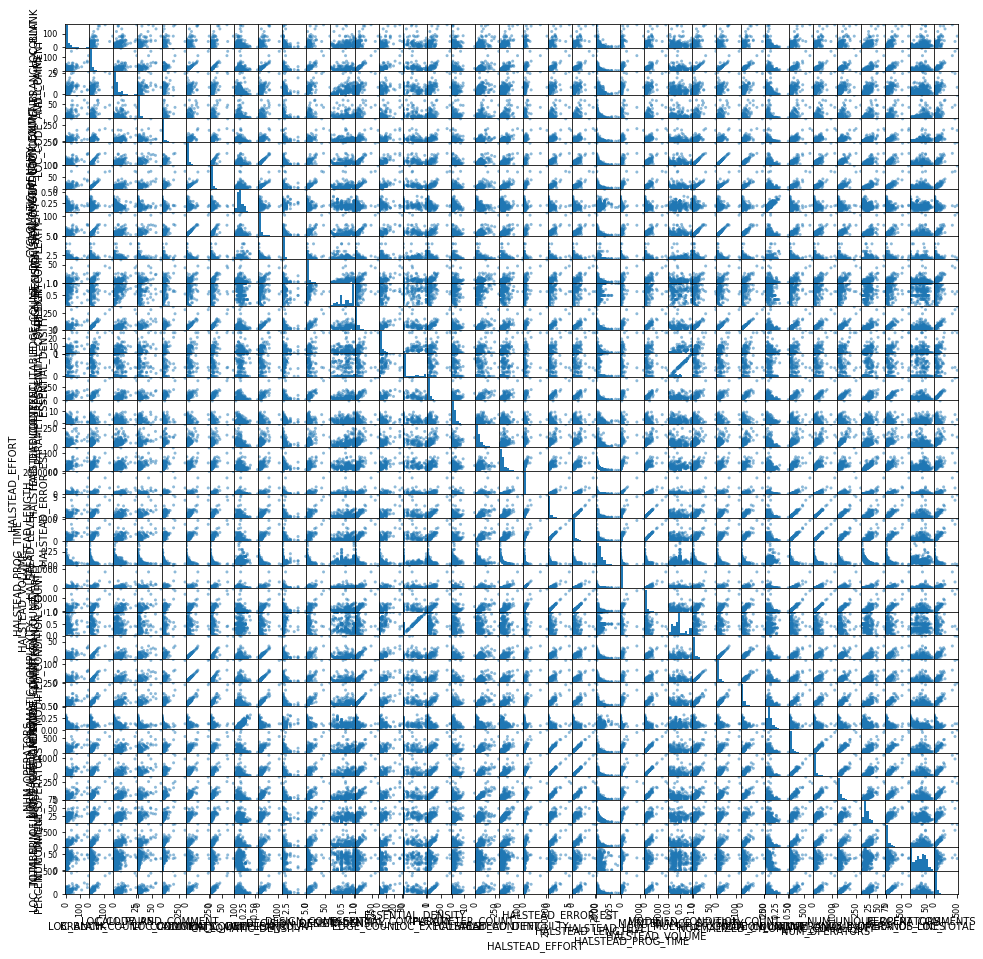

In [15]:
# Multivariate plots to look at the interactions between the variables
pd.scatter_matrix(data) 
plt.show()